These are systems with a contact Hamiltonian of the form
$$
H = ps + f(q)s + F(q, t)
$$

We will focus in particular on the Van der Pol oscillator
where $f(q) = - \epsilon (1-q^2)$ and $F(q) = q - \phi(t)$.

In [2]:
from integrators import contact as ic
from integrators.common import rk4
from lienard import integrator as li
from lienard import models as lm

def step6(system, dt, p, q, s, t, a=ic.a_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

def step6e(system, dt, p, q, s, t, a=ic.e_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

Lienard = lm.Lienard
VanDerPol = lm.VanDerPol
FritzhughNagumo = lm.FritzhughNagumo

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as si
from mpl_toolkits import mplot3d
import progressbar

In [4]:
def err(x, y):
    return np.maximum.accumulate(np.abs(x-y))

## Orbits $\epsilon = 0$

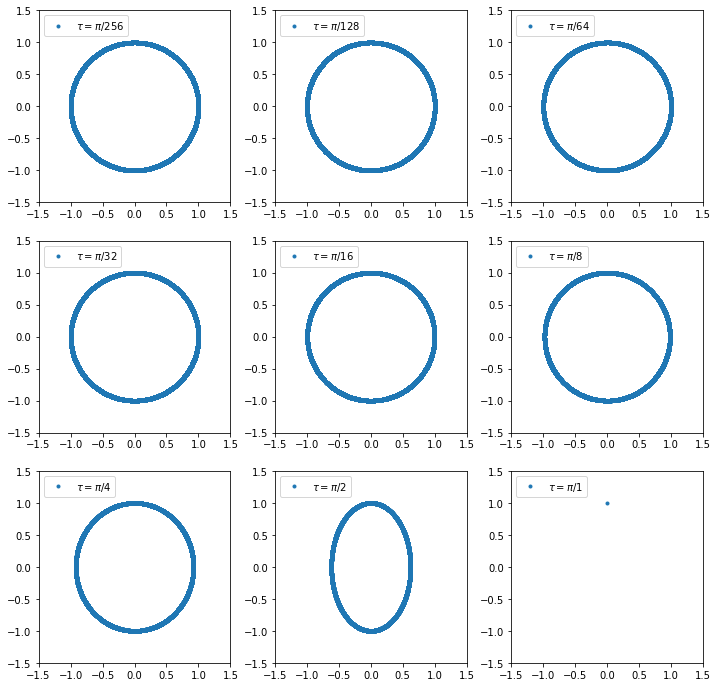

In [10]:
tf = 10000
p0, q0, s0 = 0, 0., 1.
epsilon = 0
vdp = VanDerPol(epsilon, 0, 0)
plt.figure(figsize=(12,12))
for fact, spl in [(256,"331"),(128,"332"),(64,"333"),
                (32,"334"),(16,"335"),(8,"336"),
                (4,"337"),(2,"338"),(1,"339")]:
    tspan = np.arange(0, tf, np.pi/fact)
    plt.subplot(spl)
    sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
    plt.plot(sol[:,1],sols,
             '.',label=r"$\tau = \pi $/" f"${fact}$")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim((-1.5,1.5))
    plt.ylim((-1.5,1.5))
    plt.legend(loc='upper left')

plt.show()

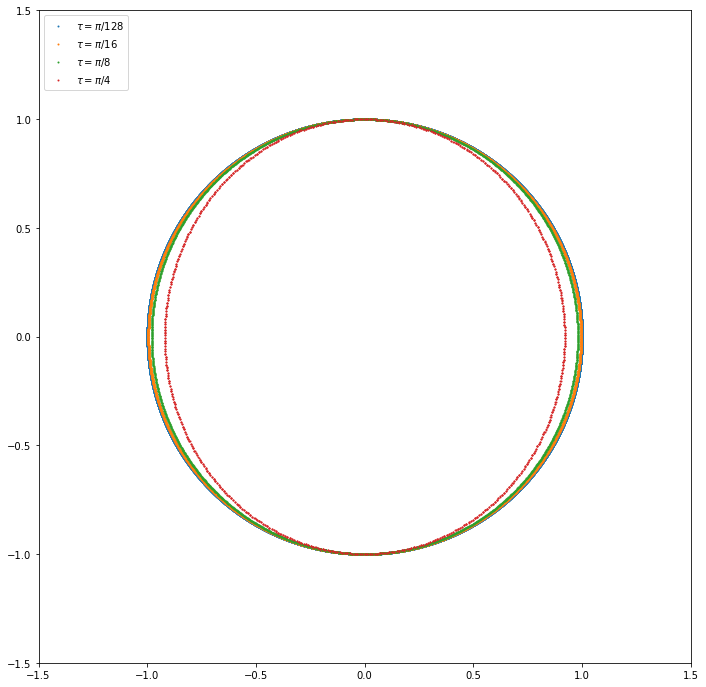

In [5]:
tf = 1000
p0, q0, s0 = 0, 0., 1.
epsilon = 0
vdp = VanDerPol(epsilon, 0, 0)
plt.figure(figsize=(12,12))

for fact in [128,16,8,4]:
    tspan = np.arange(0, tf, np.pi/fact)
    sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
    plt.plot(sol[:,1],sols,'.',
             label=r"$\tau = \pi $/" f"${fact}$",
             markersize=2)
    
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim((-1.5,1.5))
plt.ylim((-1.5,1.5))
plt.legend(loc='upper left')
plt.show()

## Orbits $\epsilon \sim 1$

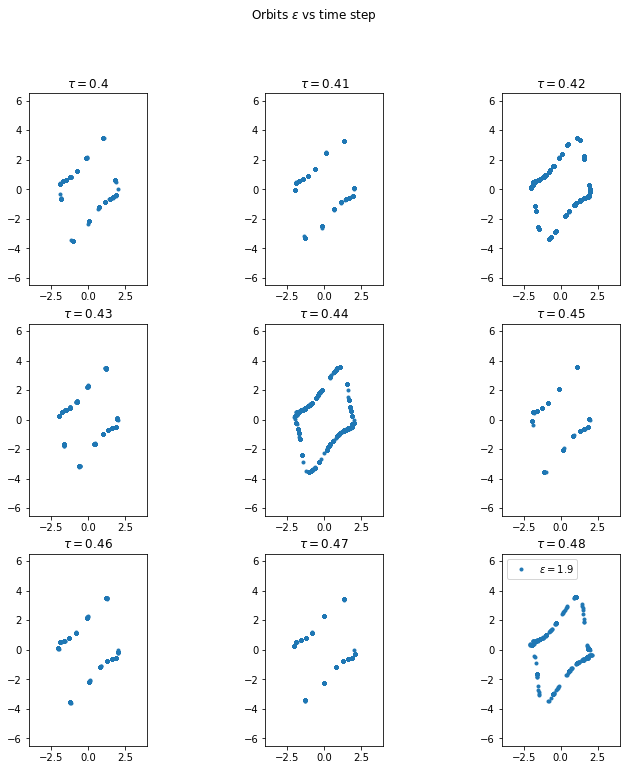

In [34]:
tf = 100000
p0, q0, s0 = 0, 2, 0
plt.figure(figsize=(12,12))
plt.suptitle(r"Orbits $\epsilon$ vs time step")
steps=[(0.4,"331"),(0.41,"332"),(0.42,"333"),
                (0.43,"334"),(0.44,"335"),(0.45,"336"),
                (0.46,"337"),(0.47,"338"),(0.48,"339")]
for fact, spl in steps:
    vdp = VanDerPol(1.5, 0, 0)
    tspan = np.arange(0, tf, fact)
    plt.subplot(spl)
    plt.gca().set_title(r"$\tau = " f"${fact}")
    sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
    plt.plot(sol[:,1],sols,'.',
             label=r"$\epsilon = $" f"${epsilon}$")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim((-4,4))
    plt.ylim((-6.5,6.5))


plt.legend(loc='upper left')
plt.show()

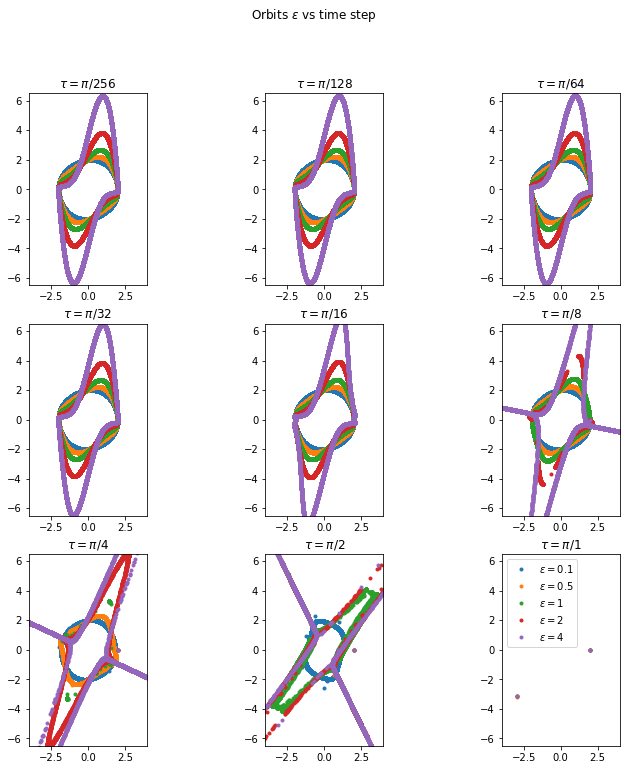

In [13]:
tf = 10000
p0, q0, s0 = 0, 2, 0
plt.figure(figsize=(12,12))
elist=[0.1,0.5,1,2,4]
plt.suptitle(r"Orbits $\epsilon$ vs time step")
steps=[(256,"331"),(128,"332"),(64,"333"),
                (32,"334"),(16,"335"),(8,"336"),
                (4,"337"),(2,"338"),(1,"339")]
for fact, spl in steps:
    for epsilon in elist:
        vdp = VanDerPol(epsilon, 0, 0)
        tspan = np.arange(0, tf, np.pi/fact)
        plt.subplot(spl)
        plt.gca().set_title(r"$\tau = \pi /" f"${fact}")
        sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
        plt.plot(sol[:,1],sols,'.',
                 label=r"$\epsilon = $" f"${epsilon}$")
        plt.gca().set_aspect('equal', adjustable='box')
        plt.xlim((-4,4))
        plt.ylim((-6.5,6.5))


plt.legend(loc='upper left')
plt.show()

## Orbits for $\epsilon \gg 1$

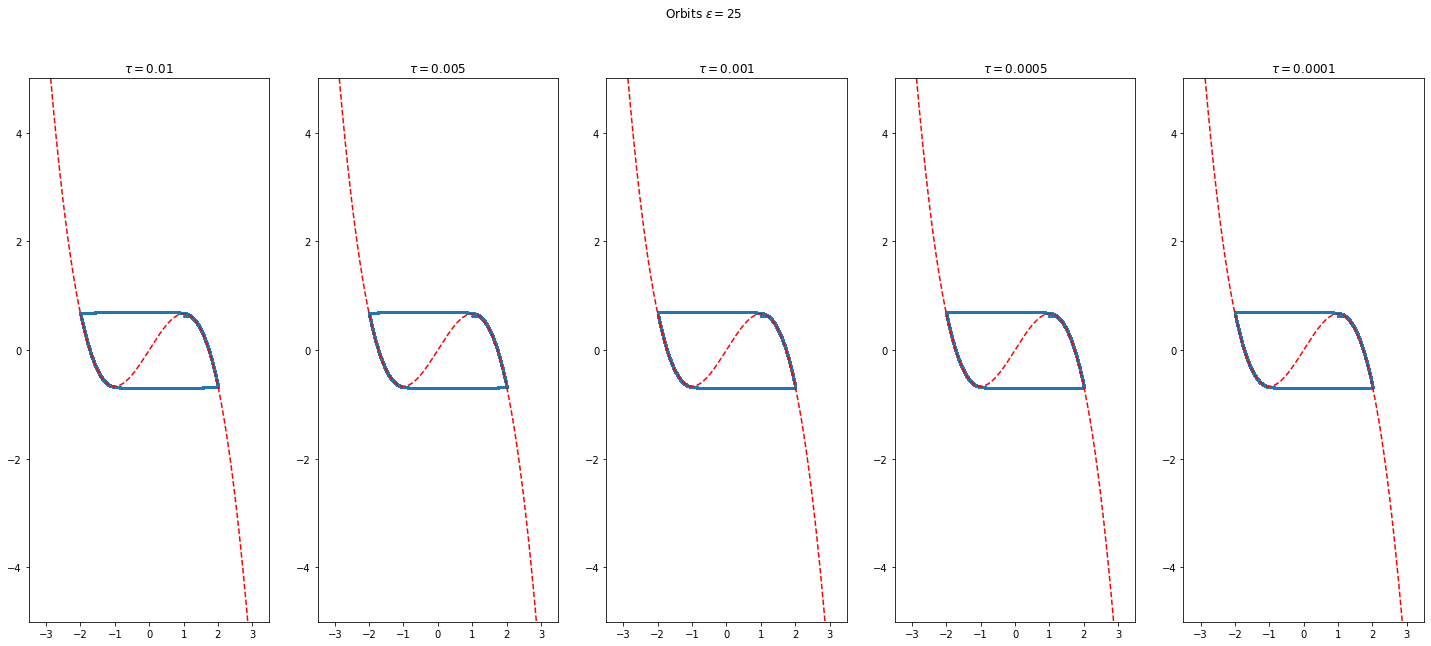

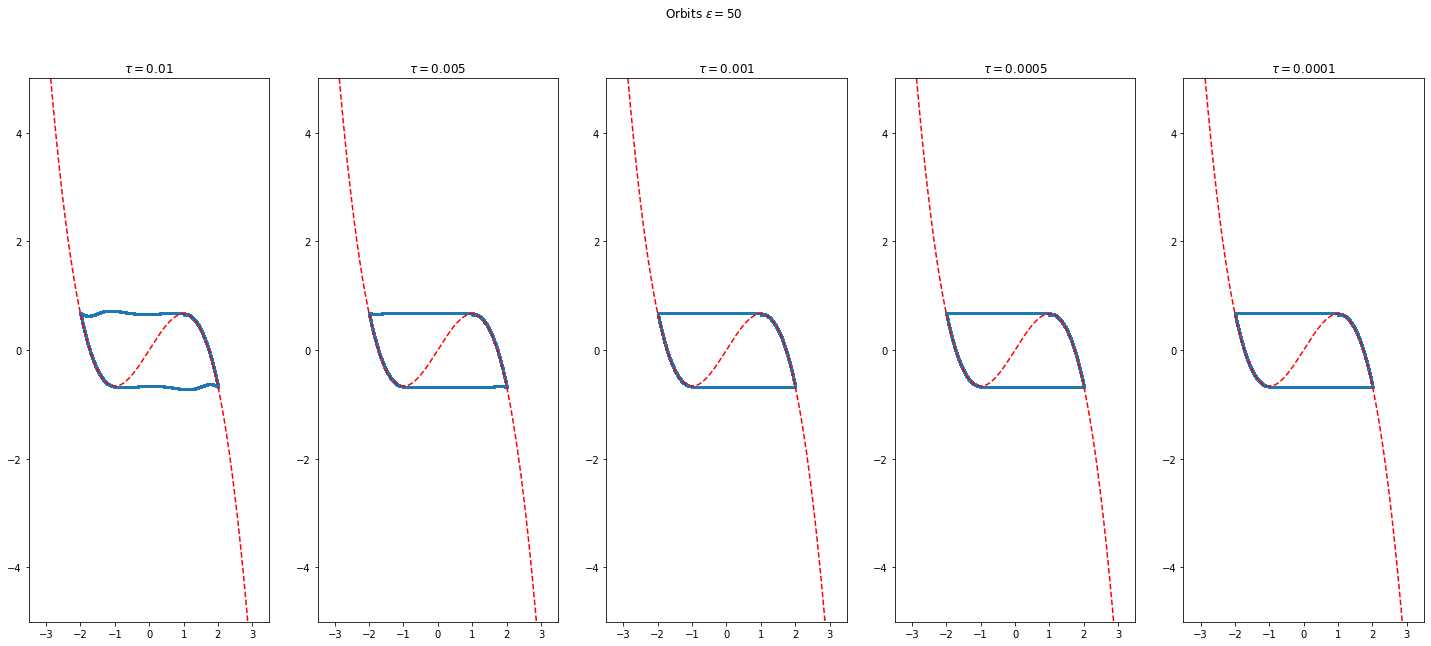

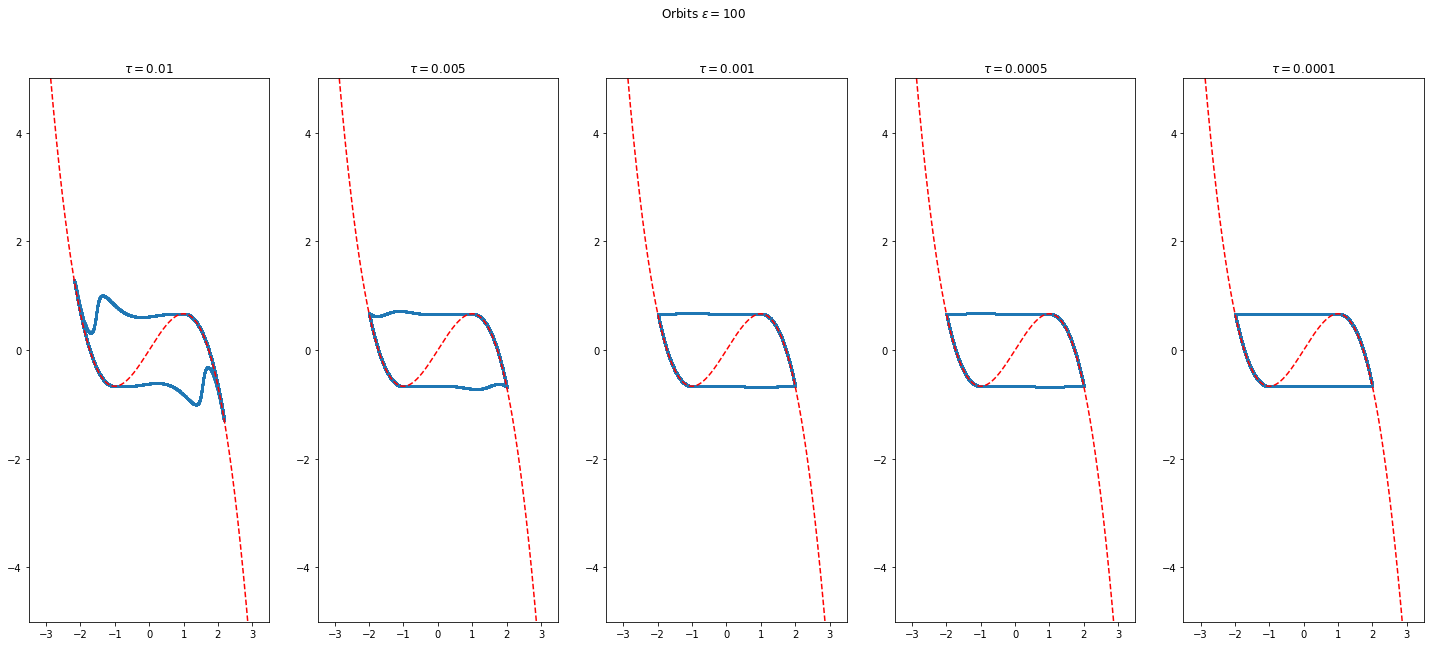

In [13]:
tf = 10000
p0, q0, s0 = -1., 1., 1.
elist=[25,50,100]
x=np.arange(-3.5,3.5,0.01)
for epsilon in elist:
    vdp = VanDerPol(epsilon, 0, 0)
    plt.figure(figsize=(15,10))
    plt.suptitle(r"Orbits $\epsilon =$" f"{epsilon}")
    for dt, spl in [(0.01,"151"),(0.005,"152"),(0.001,"153"),(0.0005,"154"),(0.0001,"155")]: 
        tspan = np.arange(0, dt*10**7, dt)
        plt.subplot(spl)
        plt.gca().set_title(r"$\tau = " f"${dt}")
        sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
        plt.plot(sol[:,1],sol[:,1]-(sol[:,1])**3 /3 - (sols/epsilon),
                 '.',markersize=3)
        plt.plot(x, x-(1/3)*(x)**3,'r--')
        plt.xlim((-3,3))
        plt.ylim((-2,2))
    plt.show()

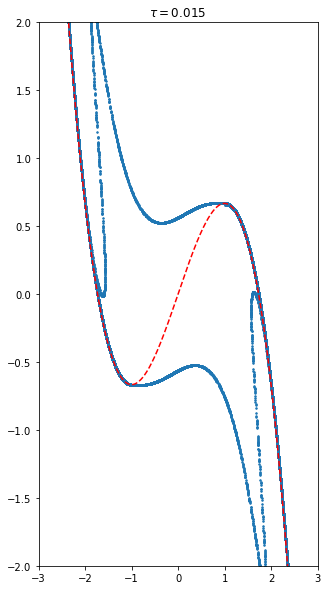

In [46]:
tf = 10000
p0, q0, s0 = -1., 1., 1.
elist=[25,50,100]
x=np.arange(-3.5,3.5,0.01)
vdp = VanDerPol(100, 0, 0)
#equilibria=[[-0.676854, -3.0209],
#            [0.676854, 3.0209],
#            [0.061395, -2.13541],
#            [-0.061395, 2.13541],
#            [1.1979, -0.681717],
#            [-1.1979, 0.681717],
#            [2.16386, -1.76074],
#            [-2.16386, 1.76074],
#            [-3.4586, 10.3532],
#            [3.11244, -6.93838],
#            [-3.11244, 6.93838],
#            [2.4928, -2.67054],
#            [-2.4928, 2.67054],
#            [0, 0]]
plt.figure(figsize=(5,10))
dt=0.015
tspan = np.arange(0, dt*10**7, dt)
plt.gca().set_title(r"$\tau = " f"${dt}")
sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
plt.plot(sol[:,1],sol[:,1]-(sol[:,1])**3 /3 - (sols/100),
        '.',markersize=3)
plt.plot(x, x-(1/3)*(x)**3,'r--')
#for i in range(len(equilibria)):
#    plt.scatter(equilibria[i][0],equilibria[i][1])
plt.xlim((-3,3))
plt.ylim((-2,2))
plt.show()

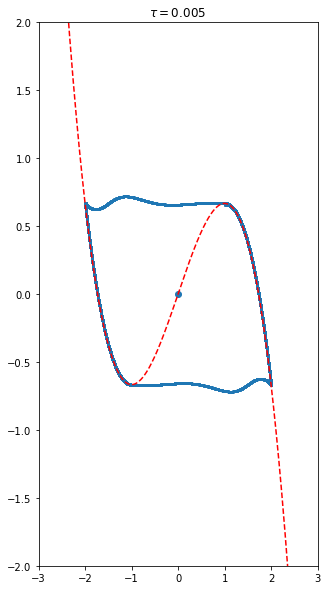

In [36]:
p0, q0, s0 = -1., 1., 1.
elist=[25,50,100]
x=np.arange(-3.5,3.5,0.01)
vdp = VanDerPol(100, 0, 0)
equilibria=[[-1.43698, 3.66647],
            [1.43698, -3.66647],
            [-2.90115, 6.85665],
            [2.90115, -6.85665],
            [-4.82125, 32.5991], 
            [4.82125, -32.5991],
            [-4.28169, 21.8838],
            [4.28169, -21.8838],
            [-3.38129, 9.50492],
            [3.38129, -9.50492],
            [0, 0]]
plt.figure(figsize=(5,10))
dt=0.005
tspan = np.arange(0, dt*10**7, dt)
plt.gca().set_title(r"$\tau = " f"${dt}")
sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
plt.plot(sol[:,1],sol[:,1]-(sol[:,1])**3 /3 - (sols/100),
        '.',markersize=3)
plt.plot(x, x-(1/3)*(x)**3,'r--')
for i in range(len(equilibria)):
    plt.scatter(equilibria[i][0],equilibria[i][1])
plt.xlim((-3,3))
plt.ylim((-2,2))
plt.show()

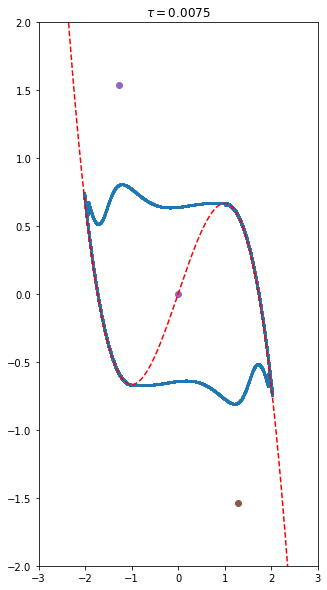

In [37]:
p0, q0, s0 = -1., 1., 1.
elist=[25,50,100]
x=np.arange(-3.5,3.5,0.01)
vdp = VanDerPol(100, 0, 0)
equilibria=[[-0.0960247, -3.84123],
            [0.0960247, 3.84123], 
            [-0.660755, -4.2436],
            [0.660755, 4.2436],
            [-1.28065, 1.53871],
            [1.28065, -1.53871],
            [-2.43442, 3.23595],
            [2.43442, -3.23595],
            [3.96746, -16.8836],
            [3.5449, -11.3043], 
            [-2.8203, 4.65723],
            [-2.8203, 4.65723],
            [-2.8203, 4.65723],
            [2.8203, -4.65723],
            [0, 0]]
plt.figure(figsize=(5,10))
dt=0.0075
tspan = np.arange(0, dt*10**7, dt)
plt.gca().set_title(r"$\tau = " f"${dt}")
sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
plt.plot(sol[:,1],sol[:,1]-(sol[:,1])**3 /3 - (sols/100),
        '.',markersize=3)
plt.plot(x, x-(1/3)*(x)**3,'r--')
for i in range(len(equilibria)):
    plt.scatter(equilibria[i][0],equilibria[i][1])
plt.xlim((-3,3))
plt.ylim((-2,2))
plt.show()

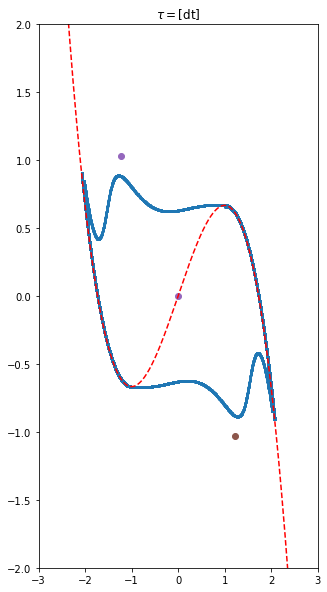

In [38]:
p0, q0, s0 = -1., 1., 1.
elist=[25,50,100]
x=np.arange(-3.5,3.5,0.01)
vdp = VanDerPol(100, 0, 0)
equilibria=[[-0.673758, -3.51182],
            [0.673758,   3.51182],
            [-0.00921169, -2.83614],
            [0.00921169, 2.83614],
            [-1.23366,1.03007],
            [1.23366, -1.03007],
            [2.28371, -2.36238],
            [-2.28371, 2.36238],
            [-3.68582, 13.0317], 
            [3.68582, -13.0317], 
            [3.30462, -8.72516], 
            [-3.30462, 8.72516], 
            [-2.63815, 3.48212], 
            [2.63815, -3.48212], 
            [0, 0]]
plt.figure(figsize=(5,10))
dt=0.00875
tspan = np.arange(0, dt*10**7, dt)
plt.gca().set_title(r"$\tau = " f"${dt}")
sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
plt.plot(sol[:,1],sol[:,1]-(sol[:,1])**3 /3 - (sols/100),
        '.',markersize=3)
plt.plot(x, x-(1/3)*(x)**3,'r--')
for i in range(len(equilibria)):
    plt.scatter(equilibria[i][0],equilibria[i][1])
plt.xlim((-3,3))
plt.ylim((-2,2))
plt.show()

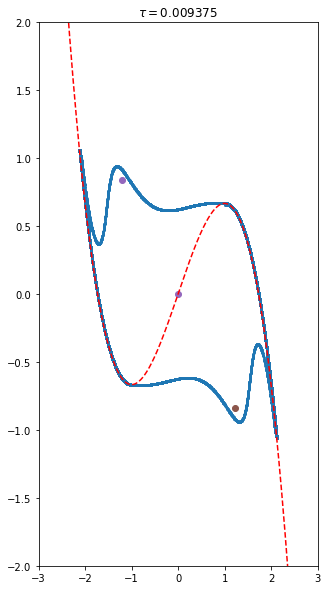

In [39]:
p0, q0, s0 = -1., 1., 1.
elist=[25,50,100]
x=np.arange(-3.5,3.5,0.01)
vdp = VanDerPol(100, 0, 0)
equilibria=[[-0.676195, -3.24351], [0.676195, 3.24351], [-0.0277025, 
  2.45579], [0.0277025, -2.45579], [-1.21463, 
  0.840595], [1.21463, -0.840595], [2.22059, -2.03555], [-2.22059, 
  2.03555], [-3.56656, 11.5799], [3.20353, -7.75579], [-3.20353, 
  7.75579], [2.56166, -3.04152], [2.56166, -3.04152], [-2.56166, 
  3.04152], [0, 0]]
plt.figure(figsize=(5,10))
dt=0.009375
tspan = np.arange(0, dt*10**7, dt)
plt.gca().set_title(r"$\tau = " f"${dt}")
sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
plt.plot(sol[:,1],sol[:,1]-(sol[:,1])**3 /3 - (sols/100),
        '.',markersize=3)
plt.plot(x, x-(1/3)*(x)**3,'r--')
for i in range(len(equilibria)):
    plt.scatter(equilibria[i][0],equilibria[i][1])
plt.xlim((-3,3))
plt.ylim((-2,2))
plt.show()

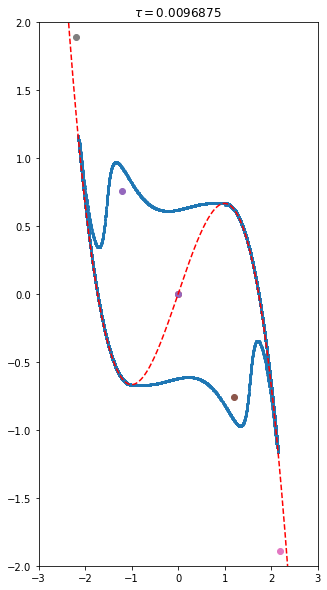

In [40]:
p0, q0, s0 = -1., 1., 1.
elist=[25,50,100]
x=np.arange(-3.5,3.5,0.01)
vdp = VanDerPol(100, 0, 0)
equilibria=[[-0.676719, -3.12715], [0.676719, 
  3.12715], [0.0449169, -2.2889], [-0.0449169, 2.2889], [-1.206, 
  0.757772], [1.206, -0.757772], [2.19149, -1.89239], [-2.19149, 
  1.89239], [-3.51128, 10.9416], [3.15684, -7.33024], [-3.15684, 
  7.33024], [2.52635, -2.84832], [-2.52635, 2.84832], [0, 0], [0, 0]]
plt.figure(figsize=(5,10))
dt=0.0096875
tspan = np.arange(0, dt*10**7, dt)
plt.gca().set_title(r"$\tau = " f"${dt}")
sol, sols, _ = ic.integrate(li.step1, vdp, tspan, p0, q0, s0)
plt.plot(sol[:,1],sol[:,1]-(sol[:,1])**3 /3 - (sols/100),
        '.',markersize=3)
plt.plot(x, x-(1/3)*(x)**3,'r--')
for i in range(len(equilibria)):
    plt.scatter(equilibria[i][0],equilibria[i][1])
plt.xlim((-3,3))
plt.ylim((-2,2))
plt.show()